<a href="https://colab.research.google.com/github/Lydianassy/Customer-Churn-Prediction-Using-Deep-Learning/blob/main/Travel_Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# common
import os
import numpy as np
import pandas as pd
import tensorflow as tf

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# splitting the data
from sklearn.model_selection import train_test_split

# model building
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import BatchNormalization

In [ ]:
df = pd.read_csv(r"/content/Customertravel.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# view the imported dataframe
df.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
# check for null values
df.isna().sum()

Age                           0
FrequentFlyer                 0
AnnualIncomeClass             0
ServicesOpted                 0
AccountSyncedToSocialMedia    0
BookedHotelOrNot              0
Target                        0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Age                         954 non-null    int64 
 1   FrequentFlyer               954 non-null    object
 2   AnnualIncomeClass           954 non-null    object
 3   ServicesOpted               954 non-null    int64 
 4   AccountSyncedToSocialMedia  954 non-null    object
 5   BookedHotelOrNot            954 non-null    object
 6   Target                      954 non-null    int64 
dtypes: int64(3), object(4)
memory usage: 52.3+ KB


In [ ]:
def plot(data, x, y):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,6))
    sns.countplot(data=data, x=x, ax=axes[0])
    sns.countplot(data=data, x=x, hue=y, ax=axes[1])


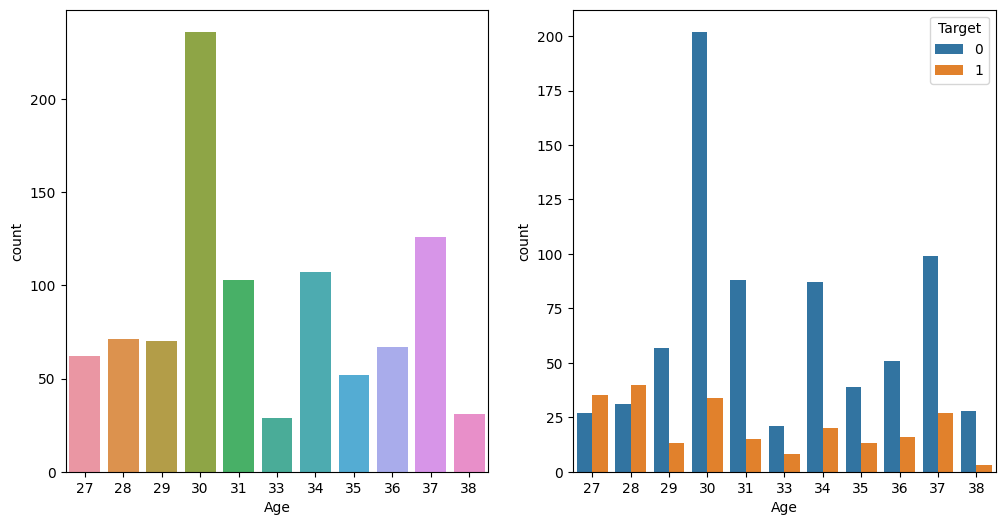

In [ ]:
# distribution of age feature
plot(data=df, x='Age', y='Target')

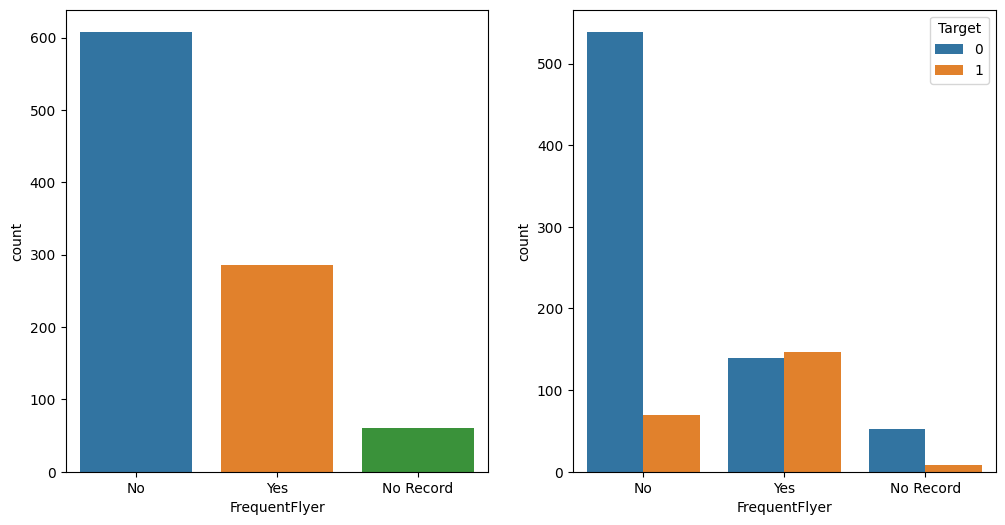

In [ ]:
# distribution of frequent flyer feature
plot(data=df, x='FrequentFlyer', y='Target')

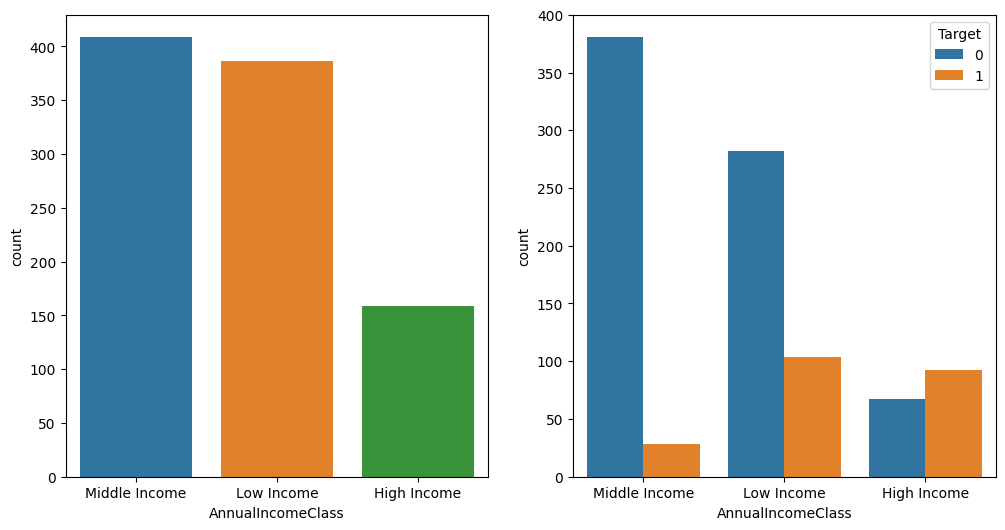

In [ ]:
# distribution of annual income class  feature
plot(data=df, x='AnnualIncomeClass', y='Target')

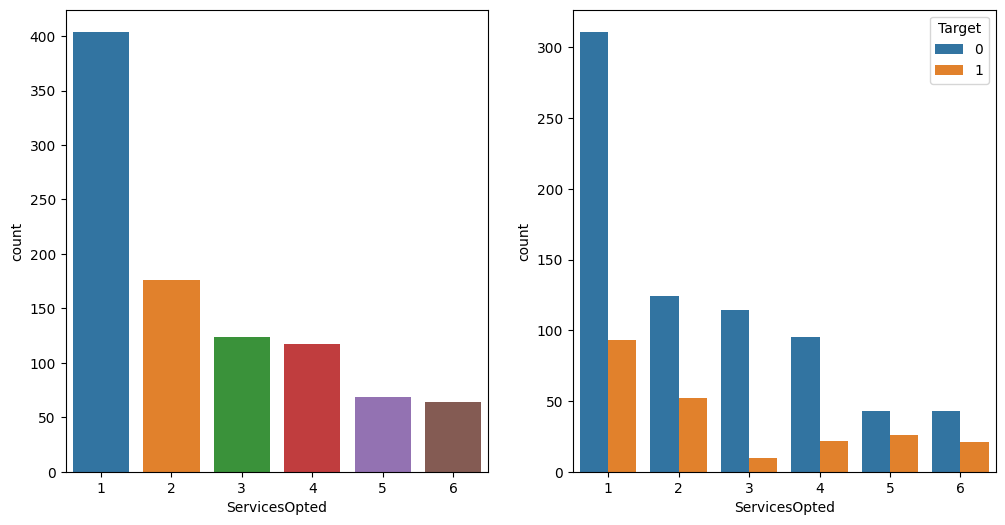

In [ ]:
# distribution of number of times services opted feature
plot(data=df, x='ServicesOpted', y='Target')

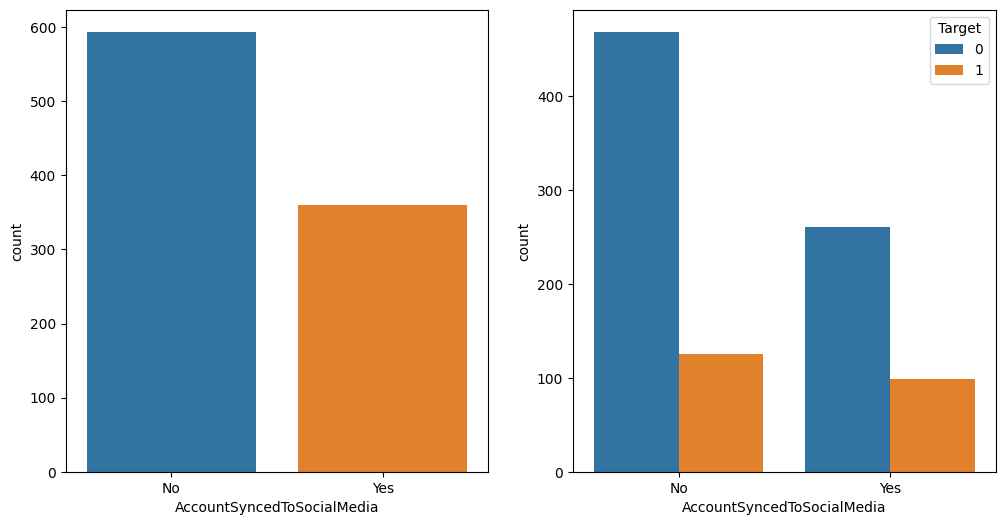

In [ ]:
# distribution of account synced to social media feature
plot(data=df, x='AccountSyncedToSocialMedia', y='Target')

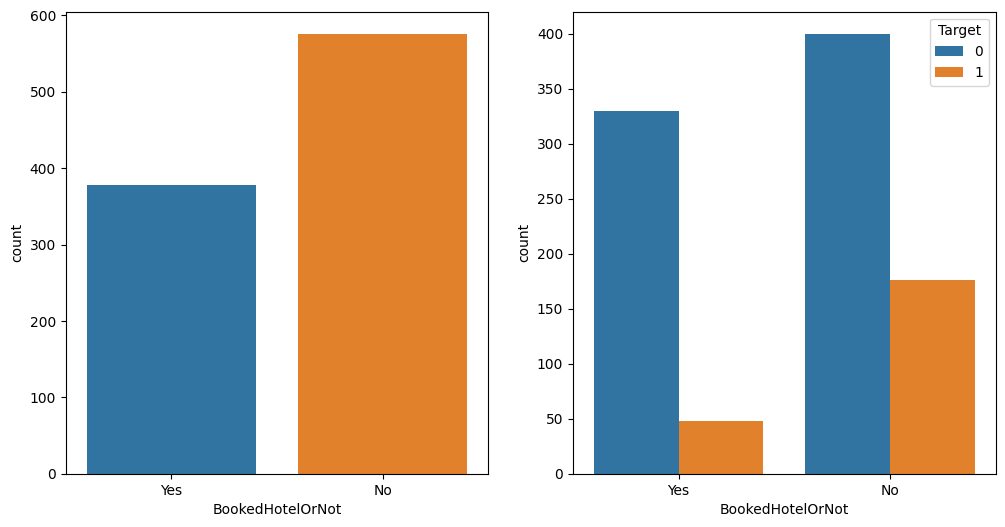

In [ ]:
# distribution of booked hotel or not feature
plot(data=df, x='BookedHotelOrNot', y='Target')

In [ ]:
# make a copy of dataframe for encoding
df_encoded = df.copy()
df_encoded.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
# make a copy of dataframe for encoding
df_encoded = df.copy()
df_encoded.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,No,Middle Income,6,No,Yes,0
1,34,Yes,Low Income,5,Yes,No,1
2,37,No,Middle Income,3,Yes,No,0
3,30,No,Middle Income,2,No,No,0
4,30,No,Low Income,1,No,No,0


In [ ]:
# converting into categorical variable
df_encoded['FrequentFlyer'] = df_encoded['FrequentFlyer'].astype('category')
df_encoded['AnnualIncomeClass'] = df_encoded['AnnualIncomeClass'].astype('category')
df_encoded['AccountSyncedToSocialMedia'] = df_encoded['AccountSyncedToSocialMedia'].astype('category')
df_encoded['BookedHotelOrNot'] = df_encoded['BookedHotelOrNot'].astype('category')
df_encoded.dtypes

Age                              int64
FrequentFlyer                 category
AnnualIncomeClass             category
ServicesOpted                    int64
AccountSyncedToSocialMedia    category
BookedHotelOrNot              category
Target                           int64
dtype: object

In [ ]:
# encoding the categorical data
df_encoded['FrequentFlyer'] = df_encoded['FrequentFlyer'].cat.codes
df_encoded['AnnualIncomeClass'] = df_encoded['AnnualIncomeClass'].cat.codes
df_encoded['AccountSyncedToSocialMedia'] = df_encoded['AccountSyncedToSocialMedia'].cat.codes
df_encoded['BookedHotelOrNot'] = df_encoded['BookedHotelOrNot'].cat.codes
df_encoded.dtypes

Age                           int64
FrequentFlyer                  int8
AnnualIncomeClass              int8
ServicesOpted                 int64
AccountSyncedToSocialMedia     int8
BookedHotelOrNot               int8
Target                        int64
dtype: object

In [ ]:
# viewing top 10 rows
df_encoded.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot,Target
0,34,0,2,6,0,1,0
1,34,2,1,5,1,0,1
2,37,0,2,3,1,0,0
3,30,0,2,2,0,0,0
4,30,0,1,1,0,0,0


In [ ]:
# splitting into feature and label
X = df_encoded.drop('Target',axis=1)
y = df_encoded['Target']

In [ ]:
# viewing the data
X.head()

,Age,FrequentFlyer,AnnualIncomeClass,ServicesOpted,AccountSyncedToSocialMedia,BookedHotelOrNot
0,34,0,2,6,0,1
1,34,2,1,5,1,0
2,37,0,2,3,1,0
3,30,0,2,2,0,0
4,30,0,1,1,0,0


In [ ]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Target, dtype: int64

In [ ]:
# splitting into train and test split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((715, 6), (239, 6), (715,), (239,))

In [ ]:
# build the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(6,)),
    BatchNormalization(),
    Dense(32, activation='relu'),
    BatchNormalization(),
    Dense(16, activation='relu'),
    BatchNormalization(),
    Dense(8, activation='relu'),
    BatchNormalization(),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                448       
                                                                 
 batch_normalization (Batch  (None, 64)                256       
 Normalization)                                                  
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_1 (Bat  (None, 32)                128       
 chNormalization)                                                
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 batch_normalization_2 (Bat  (None, 16)                6

In [ ]:
# compile the model
model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics= ['accuracy'])

In [ ]:
# fit the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50)


Epoch 1/50
23/23 [==============================] - 5s 44ms/step - loss: 0.6709 - accuracy: 0.6587 - val_loss: 0.5095 - val_accuracy: 0.7992
Epoch 2/50
23/23 [==============================] - 0s 14ms/step - loss: 0.5591 - accuracy: 0.7580 - val_loss: 0.4888 - val_accuracy: 0.7992
Epoch 3/50
23/23 [==============================] - 0s 14ms/step - loss: 0.5154 - accuracy: 0.7804 - val_loss: 0.4732 - val_accuracy: 0.7992
Epoch 4/50
23/23 [==============================] - 0s 13ms/step - loss: 0.4665 - accuracy: 0.8140 - val_loss: 0.4568 - val_accuracy: 0.7992
Epoch 5/50
23/23 [==============================] - 0s 20ms/step - loss: 0.4316 - accuracy: 0.8168 - val_loss: 0.4476 - val_accuracy: 0.8075
Epoch 6/50
23/23 [==============================] - 1s 25ms/step - loss: 0.4017 - accuracy: 0.8350 - val_loss: 0.4087 - val_accuracy: 0.7992
Epoch 7/50
23/23 [==============================] - 0s 16ms/step - loss: 0.4084 - accuracy: 0.8224 - val_loss: 0.4053 - val_accuracy: 0.7992
Epoch 8/50
23

**Trying out another Module Feed forward Neural network**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
num_classes = 7

In [ ]:
# Convert target variables to one-hot encoding
y_train_one_hot = to_categorical(y_train.values, num_classes)
y_test_one_hot = to_categorical(y_test.values, num_classes)

In [ ]:
x_train_array = x_train.values
x_test_array = x_test.values

In [ ]:
new_model = Sequential()
new_model.add(Dense(64, input_shape=(7,), activation='relu'))
new_model.add(Dense(32, activation='relu'))
new_model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# Create a new neural network model
new_model = Sequential()
new_model.add(Dense(64, input_shape=(7,), activation='relu'))
new_model.add(Dense(32, activation='relu'))

In [ ]:
# Compile the model
new_model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])


In [ ]:
# Train the model
new_history = new_model.fit(x_train_array, y_train_one_hot, validation_data=(x_test_array, y_test_one_hot), epochs=25)

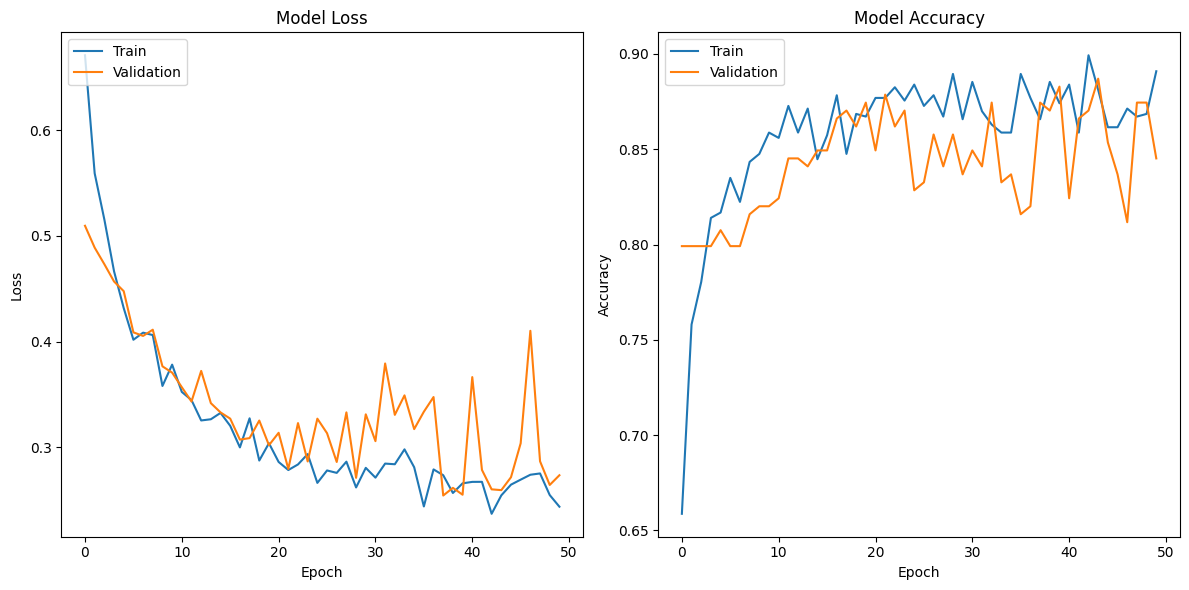

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [ ]:
model.evaluate(x_test, y_test)

8/8 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.8452


[0.27345266938209534, 0.8451882600784302]

In [ ]:
y_pred_prob = model.predict(x_test)


8/8 [==============================] - 0s 5ms/step


In [ ]:
y_pred = (y_pred_prob > 0.5).astype(int)

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)

In [ ]:
conf_mat

array([[181,  10],
       [ 20,  28]])

In [ ]:
from sklearn.metrics import classification_report
y_pred = (y_pred_prob > 0.5).astype(int)

class_report = classification_report(y_test, y_pred)


print("Classification Report:\n", class_report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       191
           1       0.74      0.58      0.65        48

    accuracy                           0.87       239
   macro avg       0.82      0.77      0.79       239
weighted avg       0.87      0.87      0.87       239



In [ ]:
model.save('customer.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
